In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns
import sys
import pandas as pd
import matplotlib.lines as mlines
from sklearn.metrics import r2_score


# Import the project utils
sys.path.insert(0, '../utilities/')
import mwc_induction_utils as mwc
import sortseq_utils as sortseq
mwc.set_plotting_style()

# Set color scheme
colors=sns.color_palette('RdPu_r', 6)[1:]
colors_alt=sns.color_palette('Blues')
colors_qual=sns.color_palette(
    ['#bf0087', '#e5b600', '#40ac00', '#5233ea', '#bf3800', '#00acac'])

sns.set_palette(colors_qual)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Making predictions from each matrix

In [4]:
# Import matrices
O1_1027_raw = np.load('../../data/models/splits/lacThermoforTO1.npy')
O2_1027_raw = np.load('../../data/models/splits/lacThermoforTO2.npy')
O3_1027_raw = np.load('../../data/models/splits/lacThermoforTO3.npy')

O1_1027_fixed = np.zeros(np.shape(O1_1027_raw))
O2_1027_fixed = np.zeros(np.shape(O2_1027_raw))
O3_1027_fixed = np.zeros(np.shape(O3_1027_raw))
for i in range(3):
    O1_1027_fixed[i] = sortseq.fix_wt(O1_1027_raw[i], 'AATTGTGAGCGGATAACAATT')
    O2_1027_fixed[i] = sortseq.fix_wt(O2_1027_raw[i], 'AAATGTGAGCGAGTAACAACC')
    O3_1027_fixed[i] = sortseq.fix_wt(O3_1027_raw[i], 'GGCAGTGAGCGCAACGCAATT')

# Create lists of RBS and operator names to be used for importing
operator_name = ['O1', 'O2', 'O3']
array_list = [O1_1027_fixed, O2_1027_fixed, O3_1027_fixed]
array_dict = dict(zip(operator_name, array_list))

# Import list of operators and their sequences

mut_ops = pd.read_csv('../../notes/Onew_mutants_list.csv')

Now let's organize all of the measured and predicted values into a single dataframe.

In [13]:
np.mean([sortseq.binding_energy(seq_dict['mut005'], array_dict['O1'][0], wt_energy=energy_dict['O1']),\
        sortseq.binding_energy(seq_dict['mut005'], array_dict['O1'][1], wt_energy=energy_dict['O1']),\
        sortseq.binding_energy(seq_dict['mut005'], array_dict['O1'][1], wt_energy=energy_dict['O1'])])

-12.538414232576665

In [14]:
# Load measured values
measured = pd.read_csv('../../data/Onew_TF_titration_nonlinear_regression_summary.csv', index_col=0)

# Set up dictionaries that can be used to make a dataframe for all predictions and measurements
energy_dict = {'O1' : -15.3, 'O2' : -13.9, 'O3' : -9.7}
repressor_dict = {'1147' : 30, '446' : 62, '1027' : 130, 'RBS1' : 610}
seq_dict = dict(zip(mut_ops['ID'], mut_ops['seq']))



df_list = [[mut, op, 130,\
            np.mean([sortseq.binding_energy(seq_dict['mut' + mut[-3:]], array_dict[op][0], wt_energy=energy_dict[op]),\
                    sortseq.binding_energy(seq_dict['mut' + mut[-3:]], array_dict[op][1], wt_energy=energy_dict[op]),\
                    sortseq.binding_energy(seq_dict['mut' + mut[-3:]], array_dict[op][2], wt_energy=energy_dict[op])]),\
            np.std([sortseq.binding_energy(seq_dict['mut' + mut[-3:]], array_dict[op][0], wt_energy=energy_dict[op]),\
                    sortseq.binding_energy(seq_dict['mut' + mut[-3:]], array_dict[op][1], wt_energy=energy_dict[op]),\
                    sortseq.binding_energy(seq_dict['mut' + mut[-3:]], array_dict[op][2], wt_energy=energy_dict[op])]),\
           measured.energy_kBT[measured.operator==mut].values[0]]\
           for mut in list(measured.operator) for op in operator_name]

df = pd.DataFrame(data=df_list, columns=['mutant', 'matrix_operator', 'matrix_repressor',\
                                         'energy_prediction_mean', 'energy_prediction_std', 'energy_measurement'])
df.sort_values(by='mutant').to_csv('../../notes/binding_energy_predictions.csv')

In [15]:
df

,mutant,matrix_operator,matrix_repressor,energy_prediction_mean,energy_prediction_std,energy_measurement
0,O1new007,O1,130,-13.475676,2.418769,-15.297297
1,O1new007,O2,130,-14.237158,0.160552,-15.297297
2,O1new007,O3,130,-23.222031,1.577393,-15.297297
3,O1new008,O1,130,-15.253542,0.114562,-14.988989
4,O1new008,O2,130,-14.183525,0.186191,-14.988989
5,O1new008,O3,130,-23.986027,1.523145,-14.988989
6,O1new009,O1,130,-12.502816,0.698377,-12.501502
7,O1new009,O2,130,-13.111713,0.260660,-12.501502
8,O1new009,O3,130,-14.542518,0.377630,-12.501502
9,O1new010,O1,130,-11.505519,0.524539,-11.296296


Now we can go through each operator (O1, O2, and O3) and see whether the number of repressors in the background strain affects the quality of the matrix predictions. For simplicity, we will only plot predictions and measurements for the single base-pair mutants. 

## O1

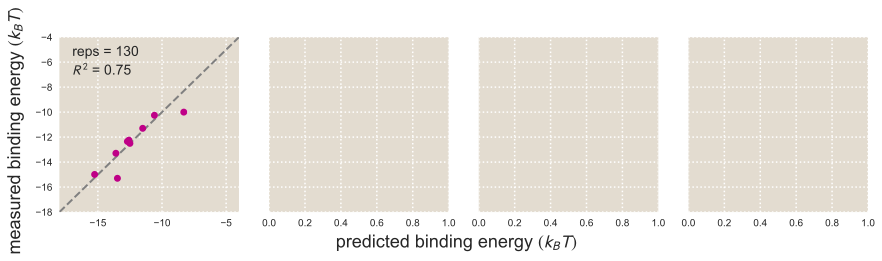

In [17]:
op = df['matrix_operator']=='O1'
fig, ax = plt.subplots(ncols=4, figsize=(12,3), sharey=True)

for i, rep_num in enumerate(df['matrix_repressor'].unique()):
    rep = df['matrix_repressor'] == rep_num
    predictions_list = df['energy_prediction_mean'][op & rep][0:9]
    measured_list = df['energy_measurement'][op & rep][0:9]
    ax[i].plot([-18, -4], [-18, -4], '--', color='gray')
    ax[i].plot(predictions_list, measured_list, 'o', color=colors_qual[i])
    ax[i].annotate('reps = %i' % rep_num, (-17, -5.5), fontsize=14)
    ax[i].annotate(r'$R^2$ = %.2f' % r2_score(measured_list, predictions_list), (-17, -7), fontsize=14)
    ax[i].set_xlim(-18, -4)
    ax[i].set_ylim(-18, -4)

plt.figtext(0.5, -0.04, r'predicted binding energy $(k_BT)$', fontsize=18, ha='center')
plt.figtext(-0.02, 0.5, r'measured binding energy $(k_BT)$', rotation='vertical', fontsize=18, va='center')
plt.tight_layout()

## O2

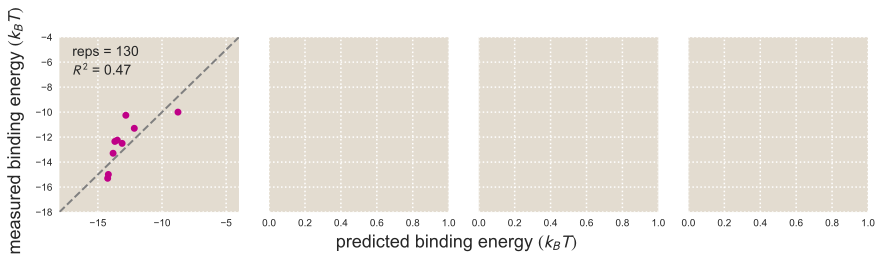

In [18]:
op = df['matrix_operator']=='O2'
fig, ax = plt.subplots(ncols=4, figsize=(12,3), sharey=True)

for i, rep_num in enumerate(df['matrix_repressor'].unique()):
    rep = df['matrix_repressor'] == rep_num
    predictions_list = df['energy_prediction_mean'][op & rep][0:9]
    measured_list = df['energy_measurement'][op & rep][0:9]
    ax[i].plot([-18, -4], [-18, -4], '--', color='gray')
    ax[i].plot(predictions_list, measured_list, 'o', color=colors_qual[i])
    ax[i].annotate('reps = %i' % rep_num, (-17, -5.5), fontsize=14)
    ax[i].annotate(r'$R^2$ = %.2f' % r2_score(measured_list, predictions_list), (-17, -7), fontsize=14)
    ax[i].set_xlim(-18, -4)
    ax[i].set_ylim(-18, -4)

plt.figtext(0.5, -0.04, r'predicted binding energy $(k_BT)$', fontsize=18, ha='center')
plt.figtext(-0.02, 0.5, r'measured binding energy $(k_BT)$', rotation='vertical', fontsize=18, va='center')
plt.tight_layout()

## O3

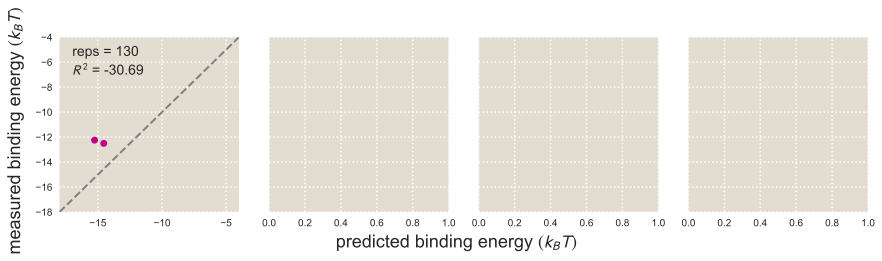

In [19]:
op = df['matrix_operator']=='O3'
fig, ax = plt.subplots(ncols=4, figsize=(12,3), sharey=True)

for i, rep_num in enumerate(df['matrix_repressor'].unique()):
    rep = df['matrix_repressor'] == rep_num
    predictions_list = df['energy_prediction_mean'][op & rep][0:9]
    measured_list = df['energy_measurement'][op & rep][0:9]
    ax[i].plot([-18, -4], [-18, -4], '--', color='gray')
    ax[i].plot(predictions_list, measured_list, 'o', color=colors_qual[i])
    ax[i].annotate('reps = %i' % rep_num, (-17, -5.5), fontsize=14)
    ax[i].annotate(r'$R^2$ = %.2f' % r2_score(measured_list, predictions_list), (-17, -7), fontsize=14)
    ax[i].set_xlim(-18, -4)
    ax[i].set_ylim(-18, -4)

plt.figtext(0.5, -0.04, r'predicted binding energy $(k_BT)$', fontsize=18, ha='center')
plt.figtext(-0.02, 0.5, r'measured binding energy $(k_BT)$', rotation='vertical', fontsize=18, va='center')
plt.tight_layout()

Surprisingly, changing the number of repressors in the background strain produces no clear effect on energy matrix quality. 